# **Final Assignment**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [93]:
#all function input should be numpy except for split function
class LogisticReg() :
    def __init__(self,learning_rate,epoch) :
        self.learning_rate=learning_rate
        self.epoch=epoch
    def split(self,x , y) :
        self.m = x.shape[0]
        self.n = x.shape[1]
        self.train_size=int(0.8*self.m)
        x_train_data = x[:self.train_size]
        x_test_data = x[self.train_size:]
        y_train_data = y[:self.train_size]
        y_test_data = y[self.train_size:]
        return x_train_data , y_train_data , x_test_data , y_test_data
    
    def fit(self,x_data , y_data) :
        self.loss_plot=[]
        self.w = np.random.rand(1,self.n)
        self.b=0
        self.x_data=np.array(x_data)
        self.y_data=np.array(y_data).reshape(-1,1)
        for i in range(self.epoch) :
            self.gd()
            self.loss_plot.append(self.loss(self.y_data,self.predict(self.x_data)))
    
    def binary_pred(self,x_test) :
        pred_value = self.predict(x_test)
        return (pred_value >= 0.5).astype(int)
                
    def predict(self,x_data) :
        value = -1*(np.dot(self.w,x_data.T)+self.b)
        logistic_value = 1/(1+(math.e**value))
        return logistic_value
    
    def gd(self) :
        grad_w = np.dot((self.predict(self.x_data)-self.y_data.T),self.x_data)/self.train_size  # 1 x n
        grad_b = np.sum(self.predict(self.x_data)-self.y_data.T)/self.train_size  # 1 x train_size
        self.w-=self.learning_rate*grad_w
        self.b-=self.learning_rate*grad_b
    
    def accuracy(self,y_test , y_pred) :
        y_test=np.array(y_test).reshape(1,-1)
        y_pred=np.array(y_pred).reshape(1,-1)
        correct_value=np.sum((y_test==y_pred).astype(int))
        total_value = y_test.shape[1]
        acc_percent = (correct_value/total_value) *100
        return acc_percent

    def loss(self,y_true,y_pred) :
        y_true=y_true.reshape(y_pred.shape[1])
        y=y_pred.reshape(y_pred.shape[1])
        loss_value = -1*np.mean(y_true*np.log(y) + (1-y_true)*np.log(1-y))
        return loss_value
        
        

In [94]:
data = pd.read_csv('./diabetes .csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
x_data = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y_data = data['Outcome']

In [96]:
model = LogisticReg(0.0001,10000)

In [97]:
x_train , y_train ,x_test, y_test = model.split(x_data,y_data)

In [98]:
model.fit(x_train,y_train)

/tmp/ipykernel_42067/1949051037.py:52: RuntimeWarning: divide by zero encountered in log
  loss_value = -1*np.mean(y_true*np.log(y) + (1-y_true)*np.log(1-y))
/tmp/ipykernel_42067/1949051037.py:52: RuntimeWarning: invalid value encountered in multiply
  loss_value = -1*np.mean(y_true*np.log(y) + (1-y_true)*np.log(1-y))


In [99]:
y_pred=model.predict(x_test)

In [100]:
y_binary=model.binary_pred(x_test)

In [101]:
model.accuracy(y_test,y_binary)

68.18181818181817

In [102]:
y_test=np.array(y_test)
loss = model.loss(y_test,y_pred)
loss

0.6198336545626797

In [103]:
x=np.linspace(0,1,len(y_test))

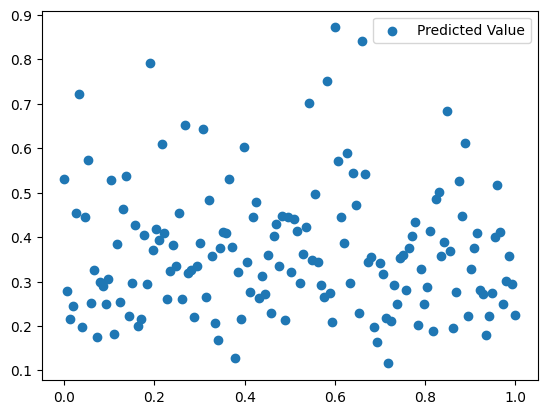

In [104]:
plt.scatter(x,y_pred)
plt.legend(['Predicted Value'])
plt.show()

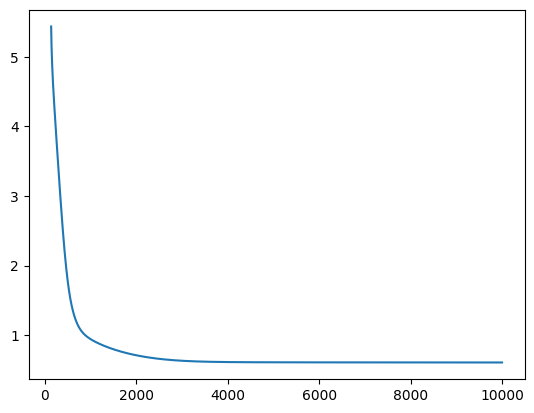

In [105]:
plt.plot(model.loss_plot)
plt.show()